In [18]:
import pandas as pd
import matplotlib as plt

In [46]:
confirmed_df = pd.read_csv("Resources/time_series_19-covid-Confirmed.csv")
confirmed_df["Status"] = confirmed_df.loc[:,'Status'] = 'Confirmed'

deaths_df = pd.read_csv("Resources/time_series_19-covid-Deaths.csv")
deaths_df["Status"] = deaths_df.loc[:,'Status'] = 'Deaths'

recovered_df = pd.read_csv("Resources/time_series_19-covid-Recovered.csv")
recovered_df["Status"] = recovered_df.loc[:,'Status'] = 'Recovered'

In [47]:
combined_data = pd.concat([confirmed_df, deaths_df, recovered_df])
combined_data.head()

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
0          Anhui  Mainland China  31.8257  117.2264        1        9   
1        Beijing  Mainland China  40.1824  116.4142       14       22   
2      Chongqing  Mainland China  30.0572  107.8740        6        9   
3         Fujian  Mainland China  26.0789  117.9874        1        5   
4          Gansu  Mainland China  36.0611  103.8343        0        2   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/19/20  2/20/20  2/21/20  \
0       15       39       60       70  ...      986      987      988   
1       36       41       68       80  ...      393      395      396   
2       27       57       75      110  ...      560      567      572   
3       10       18       35       59  ...      293      293      293   
4        2        4        7       14  ...       91       91       91   

   2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20     Status  
0      989      989      989      989      989      989  Confirmed  
1      399      399      399      400      400      410  Confirmed  
2      573      575      576      576      576      576  Confirmed  
3      293      293      293      294      294      296  Confirmed  
4       91       91       91       91       91       91  Confirmed  

[5 rows x 42 columns]

In [49]:
transposed_df = combined_data.melt(['Province/State', 'Country/Region', 'Lat', 'Long', 'Status'], var_name='Date', value_name='Cases')
transposed_df.head()

Province/State  Country/Region      Lat      Long     Status     Date  Cases
0          Anhui  Mainland China  31.8257  117.2264  Confirmed  1/22/20      1
1        Beijing  Mainland China  40.1824  116.4142  Confirmed  1/22/20     14
2      Chongqing  Mainland China  30.0572  107.8740  Confirmed  1/22/20      6
3         Fujian  Mainland China  26.0789  117.9874  Confirmed  1/22/20      1
4          Gansu  Mainland China  36.0611  103.8343  Confirmed  1/22/20      0

In [50]:
status_df = transposed_df.groupby(['Status','Date'])

cases = status_df['Cases'].sum()

status_summary = pd.DataFrame({"Cases": cases})
status_summary.reset_index()

Status     Date  Cases
0    Confirmed  1/22/20    555
1    Confirmed  1/23/20    653
2    Confirmed  1/24/20    941
3    Confirmed  1/25/20   1434
4    Confirmed  1/26/20   2118
..         ...      ...    ...
106  Recovered   2/5/20   1124
107  Recovered   2/6/20   1487
108  Recovered   2/7/20   2011
109  Recovered   2/8/20   2616
110  Recovered   2/9/20   3244

[111 rows x 3 columns]

AttributeError: module 'matplotlib' has no attribute 'show'

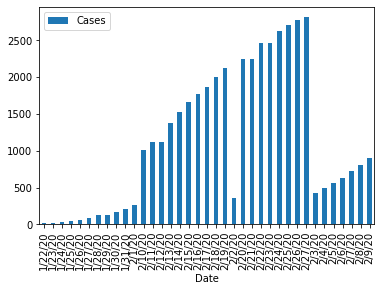

In [54]:
confirmed_summary = status_summary.loc['Deaths']
confirmed_summary.head()

confirmed_summary.plot(kind='bar')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

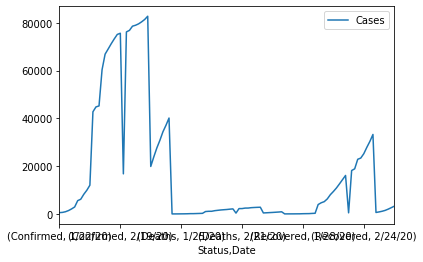

In [55]:
status_summary.plot(kind='line', stacked=True)
plt.show()